In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

#seaborn에서 제공하는 라이브러리
#sns.set_style("ticks")
# sns.set_style("darkgrid")
#sns.set_style("whitegrid")

#그래프를 그리기 위한 기본 설정
#폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트 설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'

#그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

#글자 크기
plt.rcParams['font.size'] = 14

#폰트 설정 시 - 기호 깨지는 것 방지하기
plt.rcParams['axes.unicode_minus'] = False

#plt.rcParams['figure.facecolor'] = 'white'
import missingno


- 주식정보를 읽어오기 위한 라이브러리
- pip install pandas_datareader


In [2]:
from pandas_datareader import data
import datetime

In [3]:
# 시작날짜
start = datetime.datetime(2010, 1, 1)
# 종료 날짜
end = datetime.datetime(2021, 7, 7)

In [4]:
# 삼성전자 주식 데이터를 읽어온다.
# f = data.DataReader('005930.KS', 'yahoo',start,end)
# f

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/005930.KS/history?period1=1262286000&period2=1625684399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [5]:
# 내려받은 csv 파일을 읽어온다.
f = pd.read_csv('data/005930.KS.csv')
cel = f.set_index('Date')
cel

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,13134.010742,11950800.0
2010-01-05,16520.0,16580.0,16300.0,16440.0,13345.065430,27925850.0
2010-01-06,16580.0,16820.0,16520.0,16820.0,13653.530273,22948850.0
2010-01-07,16820.0,16820.0,16260.0,16260.0,13198.952148,22107950.0
2010-01-08,16400.0,16420.0,16120.0,16420.0,13328.830078,14777550.0
...,...,...,...,...,...,...
2021-07-01,80500.0,80600.0,80000.0,80100.0,80100.000000,13382882.0
2021-07-02,80000.0,80400.0,79900.0,80000.0,80000.000000,8753097.0
2021-07-05,80100.0,80800.0,80000.0,80400.0,80400.000000,8330969.0


In [6]:
# 인덱스의 데이터 타입을 확인한다.
# dtype을 확인한다.
cel.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
       '2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06', '2021-07-07'],
      dtype='object', name='Date', length=2841)

In [7]:
# 컬럼들의 데이터 타입을 확인한다.
cel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2841 entries, 2010-01-04 to 2021-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2836 non-null   float64
 1   High       2836 non-null   float64
 2   Low        2836 non-null   float64
 3   Close      2836 non-null   float64
 4   Adj Close  2836 non-null   float64
 5   Volume     2836 non-null   float64
dtypes: float64(6)
memory usage: 155.4+ KB


In [8]:
# 인덱스를 날짜 타입으로 변경한다.(dtype float64 -> datetime64[ns])
cel.index = pd.to_datetime(cel.index, format='%Y-%m-%d')
cel.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
               '2021-07-06', '2021-07-07'],
              dtype='datetime64[ns]', name='Date', length=2841, freq=None)

### 주식 데이터 확인


In [9]:
# 데이터 프레임의 요약 정보 확인
# 컬럼이름, Dtype(머신러닝에서는 다 숫자로 구성되어야 함)
cel.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2841 entries, 2010-01-04 to 2021-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2836 non-null   float64
 1   High       2836 non-null   float64
 2   Low        2836 non-null   float64
 3   Close      2836 non-null   float64
 4   Adj Close  2836 non-null   float64
 5   Volume     2836 non-null   float64
dtypes: float64(6)
memory usage: 155.4 KB


In [10]:
cel.isna().sum()

Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

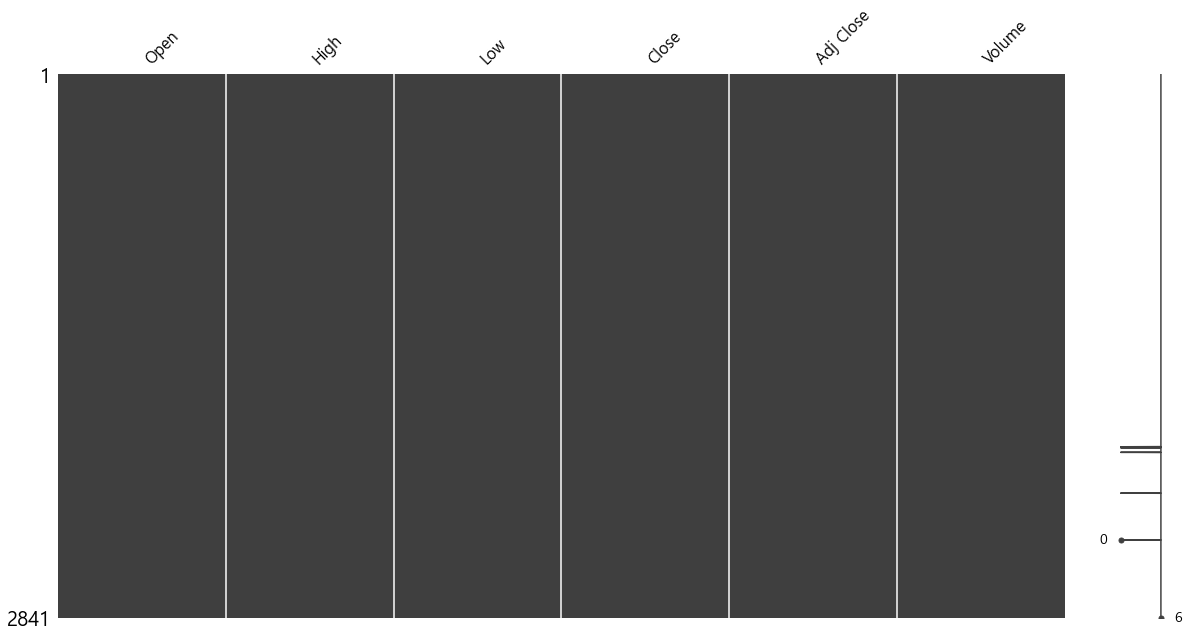

In [11]:
missingno.matrix(cel, figsize = (20,10));

In [12]:
cel[cel['Open'].isna()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 결측치는 제거한다
cel.dropna(inplace=True)
cel.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 일 별 수익률 계산

In [14]:
# 이전 데이터와 얼마나 차이가 나는가.

cel['Close'].diff()

Date
2010-01-04      NaN
2010-01-05    260.0
2010-01-06    380.0
2010-01-07   -560.0
2010-01-08    160.0
              ...  
2021-07-01   -600.0
2021-07-02   -100.0
2021-07-05    400.0
2021-07-06    800.0
2021-07-07   -400.0
Name: Close, Length: 2836, dtype: float64

In [17]:
#이전보다 몇 퍼센트 정도 등락했는지 (-1 ~ 0 ~ 1)
cel['Close'].pct_change()


Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2021-07-01   -0.007435
2021-07-02   -0.001248
2021-07-05    0.005000
2021-07-06    0.009950
2021-07-07   -0.004926
Name: Close, Length: 2836, dtype: float64

In [18]:
# diff 에 대한 시각화
a1 = cel['Close'].diff()

#최소와 최대값을 구한다.
a1_min = a1.min()
a1_max = a1.max()
print(a1_min)
print(a1_max)

-3000.0
5900.0


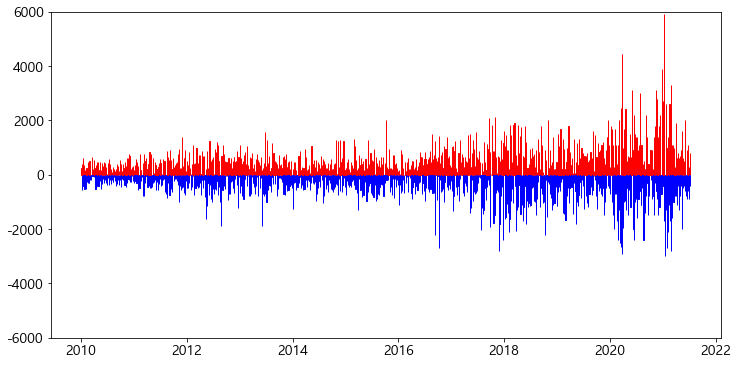

In [30]:
# 막대 그래프를 그린다. 반환으로 막대들을 관리할 수 있는 객체를 받는다.
bar_list = plt.bar(a1.index, a1.values)
# print(bar_list)

#값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values):
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')
        

plt.ylim(-6000, 6000)

plt.show()

In [31]:
a1.values < 0

array([False, False, False, ..., False, False,  True])

In [32]:
a1[a1.values < 0]
# abs절댓값 쓰면 하나도 안나옴.

Date
2010-01-07   -560.0
2010-01-11   -480.0
2010-01-13   -240.0
2010-01-19   -400.0
2010-01-22   -500.0
              ...  
2021-06-29   -900.0
2021-06-30   -300.0
2021-07-01   -600.0
2021-07-02   -100.0
2021-07-07   -400.0
Name: Close, Length: 1315, dtype: float64

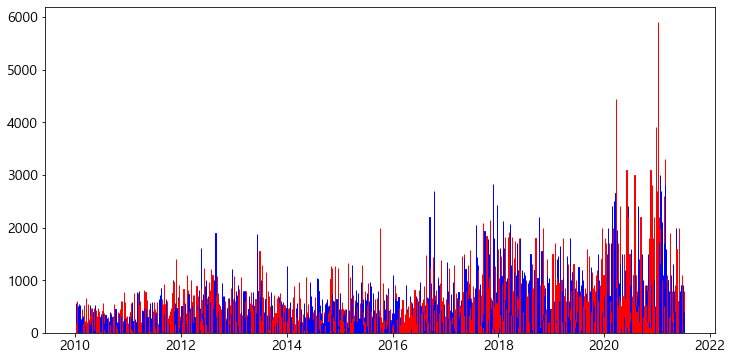

In [34]:
# 막대 그래프를 그린다. 반환으로 막대들을 관리할 수 있는 객체를 받는다.
bar_list = plt.bar(a1.index, abs(a1.values))
# print(bar_list)

#값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values):
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')

plt.show()

In [39]:
# 이전보다 몇 퍼센트 등락
a1 = cel['Close'].pct_change()
a1 = a1 * 100
a1

Date
2010-01-04         NaN
2010-01-05    1.606922
2010-01-06    2.311436
2010-01-07   -3.329370
2010-01-08    0.984010
                ...   
2021-07-01   -0.743494
2021-07-02   -0.124844
2021-07-05    0.500000
2021-07-06    0.995025
2021-07-07   -0.492611
Name: Close, Length: 2836, dtype: float64

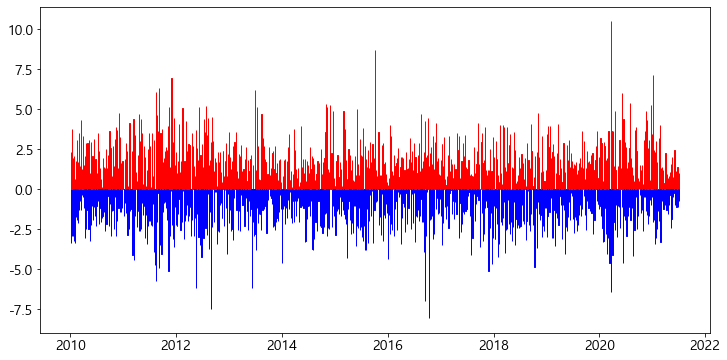

In [40]:
# 막대 그래프를 그린다. 반환으로 막대들을 관리할 수 있는 객체를 받는다.
bar_list = plt.bar(a1.index, a1.values)
# print(bar_list)

#값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values):
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')

plt.show()

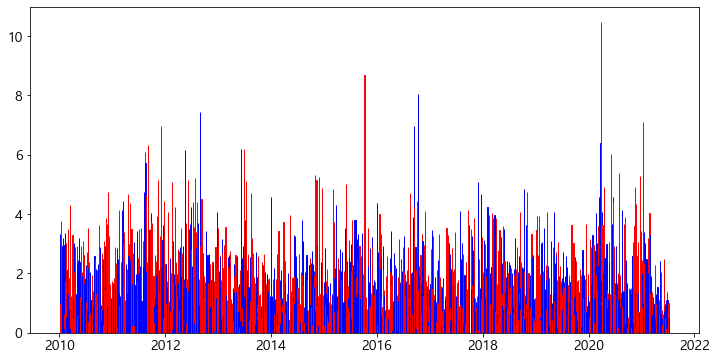

In [41]:
# 막대 그래프를 그린다. 반환으로 막대들을 관리할 수 있는 객체를 받는다.
bar_list = plt.bar(a1.index, abs(a1.values))
# print(bar_list)

#값이 0보다 크면 빨간색, 작으면 파란색으로 설정한다.
for idx, value in enumerate(a1.values):
    if value > 0 :
        bar_list[idx].set_color('r')
    elif value < 0 :
        bar_list[idx].set_color('b')

plt.show()

### 종가를 시각화한다.
- 하위 10% 이하, 상위 90% 이상을 다른 색상으로 표시한다.
- 10% 지점, 90% 지점에 기준선을 표시한다.
- x축은 일자, y축은 종가로 표시한다.

In [42]:
# 종가
cel_close = cel['Close']
cel_close

#index = x, 값 = y

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2021-07-01    80100.0
2021-07-02    80000.0
2021-07-05    80400.0
2021-07-06    81200.0
2021-07-07    80800.0
Name: Close, Length: 2836, dtype: float64

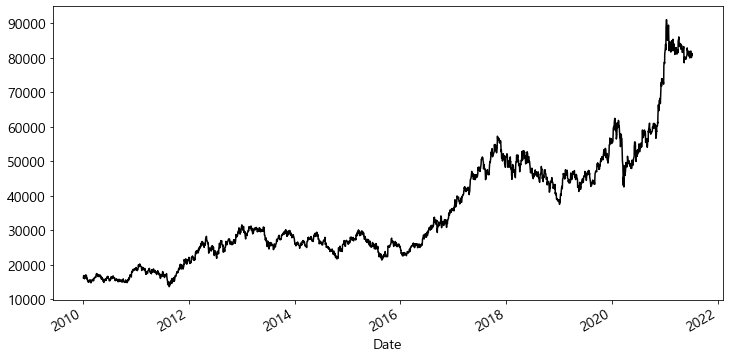

In [45]:
# 시각화
# 데이터 프레임이나 시리즈로 선그래프를 그리면
## 인덱스가 x축이 되고, 값이  y축으로 지정된다.
cel_close.plot(color='black')
plt.show()

### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 10%, 90%


In [46]:
# 10%, 90% 위치 값을 가져온다.
value_10 = cel_close.quantile(0.1)
value_90 = cel_close.quantile(0.9)

print(value_10)
print(value_90)

17000.0
55800.0


In [54]:
# 요약 통계 정보를 가져온다.
a1 = cel_close.describe(percentiles=[0.1,0.9])

value_10 = a1['10%']
value_90 = a1['90%']

print(value_10)
print(value_90)

17000.0
55800.0


In [55]:
# 10% 이하의 값들
a2 = cel_close <= value_10
a2

Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2021-07-01    False
2021-07-02    False
2021-07-05    False
2021-07-06    False
2021-07-07    False
Name: Close, Length: 2836, dtype: bool

In [56]:
# 90% 이상
a3 = cel_close >= value_90
a3

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2021-07-01     True
2021-07-02     True
2021-07-05     True
2021-07-06     True
2021-07-07     True
Name: Close, Length: 2836, dtype: bool

In [57]:
# 둘을 합친다.
a4 = a2 | a3
a4

Date
2010-01-04    True
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
              ... 
2021-07-01    True
2021-07-02    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Name: Close, Length: 2836, dtype: bool

In [58]:
# 10% 이하, 90% 이상인 것들을 가져온다.
cel_top_bottom = cel_close[a4]
cel_top_bottom

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2021-07-01    80100.0
2021-07-02    80000.0
2021-07-05    80400.0
2021-07-06    81200.0
2021-07-07    80800.0
Name: Close, Length: 571, dtype: float64

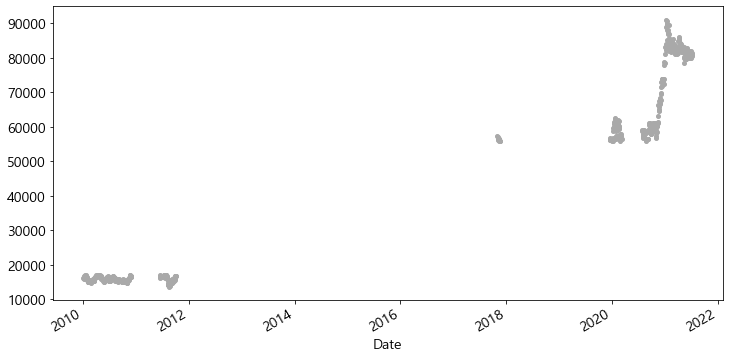

In [63]:
# 시각화
# style : 선의 모양. ' '를 주면 선의 모양은 빈칸이 된다.
# marker : 마커의 모양
# ms : 마커의 크기
# color : 색상
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

### 기준선을 그린다.

In [72]:
# x축의 좌표로 사용할 최소 날짜와 최대 날짜를 추출한다.
cel_close
print(cel_close)

index_min = cel_close.index[0]
index_max = cel_close.index[-1]
print(index_min)
print(index_max)

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2021-07-01    80100.0
2021-07-02    80000.0
2021-07-05    80400.0
2021-07-06    81200.0
2021-07-07    80800.0
Name: Close, Length: 2836, dtype: float64
2010-01-04 00:00:00
2021-07-07 00:00:00


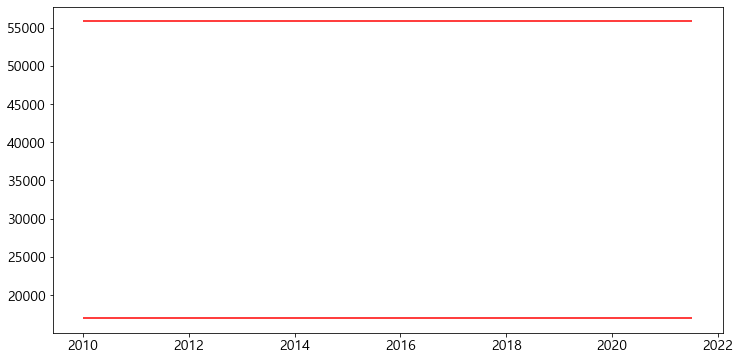

In [74]:
#가로선을 그린다.
plt.hlines(xmin = index_min, xmax = index_max, y=[value_10, value_90],
           color = 'red')
plt.show()

### 3가지를 합친다.

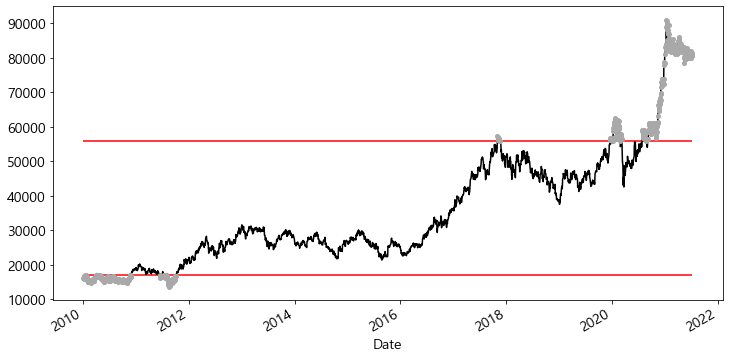

In [77]:
cel_close.plot(color='black')
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.hlines(xmin = index_min, xmax = index_max, y=[value_10, value_90],
           color = 'red')
plt.show()

### 통계량 살펴보기

In [78]:
# 각 날짜의 수익률을 가져온다.
cel_pct_change = cel['Close'].pct_change()
cel_pct_change

Date
2010-01-04         NaN
2010-01-05    0.016069
2010-01-06    0.023114
2010-01-07   -0.033294
2010-01-08    0.009840
                ...   
2021-07-01   -0.007435
2021-07-02   -0.001248
2021-07-05    0.005000
2021-07-06    0.009950
2021-07-07   -0.004926
Name: Close, Length: 2836, dtype: float64

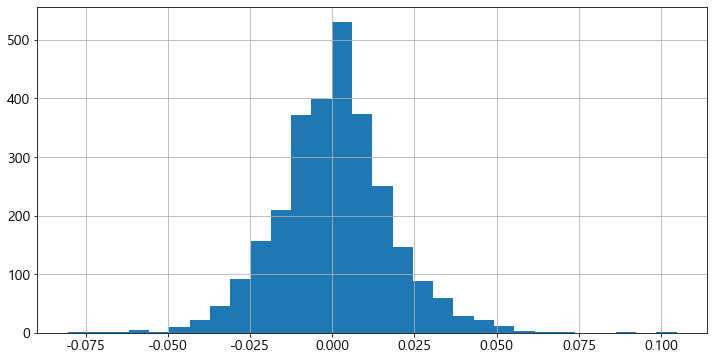

In [79]:
cel_pct_change.hist(bins=30)
plt.show()
# 데이터 분포도 보기 좋음.


### 첨도(Kurtosis)
- 첨도는 히스토그램에서 분포의 꼬리부분의 길이와 중앙 부분의 뾰족함을 대한 정보를 제공하는 통계량이다.
- 첨도가 0보다 크면 긴 꼬리를 갖고 분포가 중앙 부분에 덜 분포되어 있는 것으로 해석된다.

In [80]:
cel_pct_change.kurt()

1.6307384693281213

### 왜도
- 분포의 비대칭 정도를 나타내는 값
- 분포가 완전 대칭인 경우에는 왜도가 0이다.
- 왼쪽으로 긴 꼬리를 가지면 음수이고, 오른쪽으로 긴 꼬리를 가지면 양수이다.
- 비대칭 정도가 심할수록 왜도의 절대값이 증가한다.

In [81]:
cel_pct_change.skew()

0.17778685925311755